# (Ford GoBike System Data)
## by (Seif Ahmed Abdelaal)

## Preliminary Wrangling

> exploration of the data set of a bicycle rental company.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime


%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# Rows * columns
df.shape

(183412, 16)

In [4]:
# type of any column
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
# checking if there are any duplicates
sum(df.duplicated())

0

In [6]:
# more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
# drop null values 
df.dropna(inplace=True)
df[df.member_gender.isnull()]
df[df.member_birth_year.isnull()]
df.shape

(174952, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [9]:
# drop columns that would not help me on analyzing data
df = df.drop(['end_time', 'start_station_id', 'start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'], axis = 1)


In [10]:
df.head(20)

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,Post St at Kearny St,Mission Playground,6488,Subscriber,1992.0,Male,No
10,458,2019-02-28 23:57:57.2110,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,1996.0,Female,Yes


In [11]:
# changing the type of data of some columns 
df.start_time = pd.to_datetime(df.start_time)
df.member_birth_year = df.member_birth_year.astype(int)

In [12]:
# Extract hour,day and month from the column (start_time) to help me on analyzing data
df['month'] = df.start_time.dt.strftime('%b')
df['day'] = df.start_time.dt.strftime('%a')
df['hour'] = df.start_time.dt.strftime('%H')

In [13]:
# make a new column (age_user) that told us age of user
df['age_user'] = datetime.now().year - df.member_birth_year

In [14]:
df.head()

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,age_user
0,52185,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Feb,Thu,17,38
2,61854,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Feb,Thu,12,50
3,36490,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Feb,Thu,17,33
4,1585,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Feb,Thu,23,48
5,1793,2019-02-28 23:49:58.632,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,Feb,Thu,23,63


## Univariate Exploration

# What is the category of people who use the product the most? customers or subscribers ?

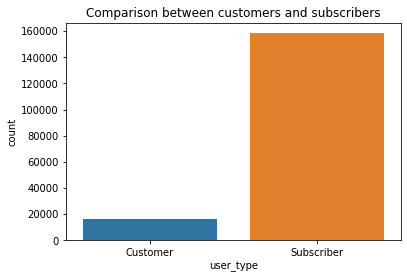

In [15]:
# Comparison between customers and subscribers
sb.countplot(data=df,x='user_type');
plt.title('Comparison between customers and subscribers');


### Based on this graph, we can say that the number of subscribers is much greater than the number of customers

# What is the gender who use the product the most?

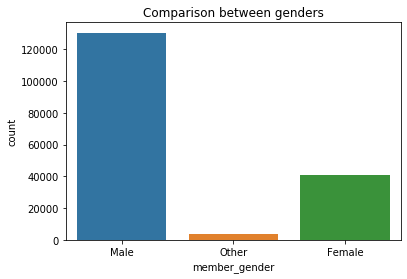

In [16]:
# Comparison between genders 
sb.countplot(data=df,x='member_gender');
plt.title('Comparison between genders');


### Based on this graph, we can say that the number of males is greater than the number of females and others

# All bikes are share for all trip?

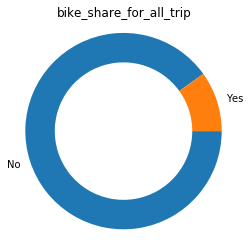

In [17]:
# Comparison between bikes that share for all trip and bikes does not
alltrip = df['bike_share_for_all_trip'].value_counts()
plt.pie(alltrip,labels=alltrip.index,counterclock=False,wedgeprops={'width':0.3});
plt.title('bike_share_for_all_trip')
plt.axis('square');

### Based on this graph, we can say that the number of bikes that share for all trip is much smaller than the number of bikes that does not

In [18]:
# describe of column (age_user)
df.age_user.describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: age_user, dtype: float64

# What age stage has the highest percentage of users?

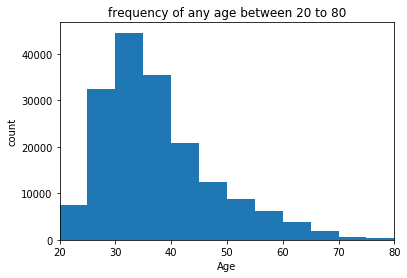

In [19]:
#Histogram (age_user)
bins = np.arange(0,df['age_user'].max()+5,5)
plt.hist(data=df,x='age_user',bins=bins);
plt.xlim((20,80));
plt.title('frequency of any age between 20 to 80');
plt.xlabel('Age');
plt.ylabel('count');

### Based on this graph, we can say that the number of users whose age from 30 to 40 is bigger than any other age stage

# What is the busiest day of the week in terms of users?

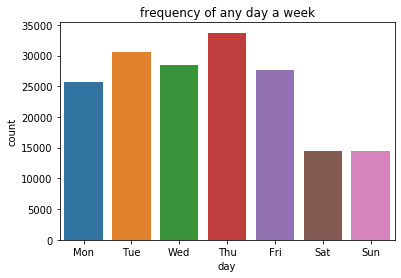

In [37]:
# Bar chart (day) 
sb.countplot(data=df,x='day', order= (['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])); 
plt.title('frequency of any day a week');

### Based on this graph, we can say that the thursday is the much day 

In [21]:
# change the type of column (hour)
df.hour = df.hour.astype(int)
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
start_station_name                 object
end_station_name                   object
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
month                              object
day                                object
hour                                int32
age_user                            int32
dtype: object

# What is the busiest hour of the day in terms of users?

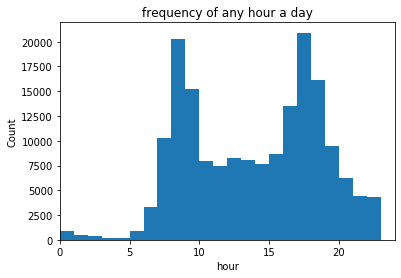

In [22]:
#Histogram (hour)
bins = np.arange(0,df['hour'].max()+1,1)
plt.hist(data=df,x='hour',bins=bins);
plt.xlim((0,24));
plt.title('frequency of any hour a day')
plt.xlabel('hour');
plt.ylabel('Count');

### Based on this graph, we can say that The time from eight to ten and from seventeen to twenty are the two times in which there are most users

## Bivariate Exploration


# what is the relation between user age and duration sec?

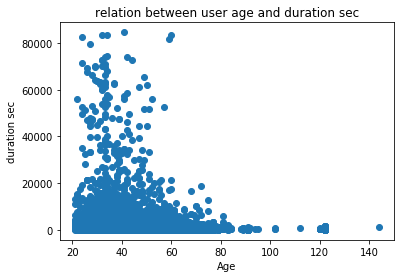

In [23]:
# scatter (age_user),(duration_sec) 
plt.scatter(data=df,x='age_user',y='duration_sec');
plt.title('relation between user age and duration sec');
plt.xlabel('Age');
plt.ylabel('duration sec');

### Based on this graph, we can say that most users age from 20 to 80 and their duration sec less than 40.000 sec 

# what is the relation between member gender and user type ?

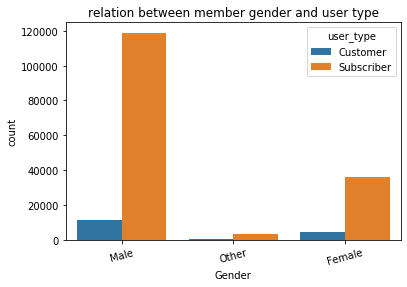

In [24]:
# Clustered (member_gender),(User_type)
sb.countplot(data=df,x='member_gender',hue='user_type');
plt.xticks(rotation=15);
plt.title('relation between member gender and user type');
plt.xlabel('Gender');
plt.ylabel('count');

### Based on this graph, we can say that the number of subscribers is much greater than the number of customers, regardless of gender

# Does gender difference affect on duration sec ? 

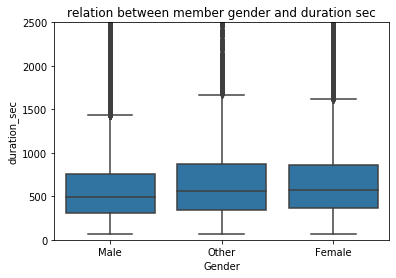

In [25]:
# Box plot (member_gender),(duration_sec)
base_color = sb.color_palette()[0]
sb.boxplot(data=df,x='member_gender',y='duration_sec',color=base_color);
plt.ylim((0,2500));
plt.title('relation between member gender and duration sec');
plt.xlabel('Gender');
plt.ylabel('duration_sec');

### Based on this graph, we can say that The duration sec is almost the same, regardless of gender

# Does day difference affect on duration sec ?

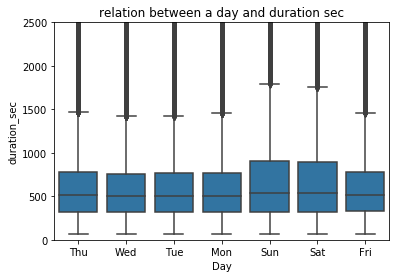

In [26]:
# Box plot (day),(duration_sec)
base_color = sb.color_palette()[0]
sb.boxplot(data=df,x='day',y='duration_sec',color=base_color);
plt.ylim((0,2500));
plt.title('relation between a day and duration sec');
plt.xlabel('Day');
plt.ylabel('duration_sec');

### Based on this graph, we can say that the Users consume more time on Saturdays and Sundays than on other days of the week

## Multivariate Exploration


# Is there any relationship between Age , duration sec and member gender ?

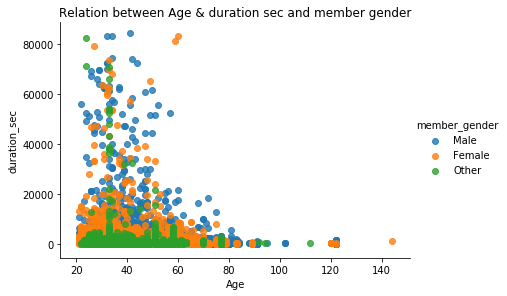

In [27]:
#Scatter (Age),(duration_sec),(member_gender)
g = sb.FacetGrid(data=df,hue='member_gender',hue_order=['Male','Female','Other'],height=4,aspect=1.5);
g = g.map(sb.regplot,'age_user','duration_sec',x_jitter=.04,fit_reg = False);
g.add_legend();
plt.xlabel('Age');
plt.ylabel('duration_sec');
plt.title('Relation between Age & duration sec and member gender');


### Based on this graph, we can say that The probability of the presence of males is more than the probability of the presence of other genders in the age group between twenty and eighty, regardless of the duration sec

# Is there any relationship between Age , duration sec and user type ?

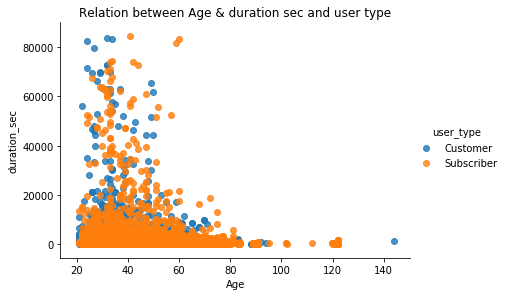

In [28]:
# Scatter (Age),(duration_sec),(user_type)
g = sb.FacetGrid(data=df,hue='user_type',hue_order=['Customer','Subscriber'],height=4,aspect=1.5);
g = g.map(sb.regplot,'age_user','duration_sec',x_jitter=.04,fit_reg = False);
g.add_legend();
plt.xlabel('Age');
plt.ylabel('duration_sec');
plt.title('Relation between Age & duration sec and user type');


### Based on this graph, we can say that The probability of the presence of subscribers is more than the probability of the presence of customers in the age group between twenty and eighty, regardless of the duration sec

# What is the effect of each factor on the other?

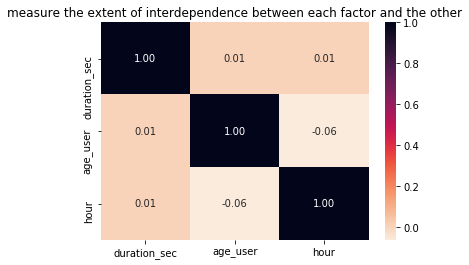

In [29]:
# Attempt to measure the extent of interdependence between each factor and the other (heatmap)
s = ['duration_sec','age_user','hour']
sb.heatmap(df[s].corr(),cmap='rocket_r',annot=True,fmt='.2f');
plt.title('measure the extent of interdependence between each factor and the other');

### there are a negative correlation between age of user and hour,there are a positive correlation between duration sec and hour , duration sec and age user

In [30]:
df.to_csv('df_after.csv', index=False)
